# Analysis of Police Shootings in US
## Zukhra Mazhitova 
## BD-1902


### Content
+ Introduction
+ Data description and objectives
+ Data preraration: cleaning and shaping
    + Identifying and dealing with null values
    + Preparation for scrapping
    + Scrapping
+ Data Analysis (Visualisation)
+ Conclusion

## 1. Introduction


In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post.

After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so.

Another major event which occured on May 25, 2020, was death of murder of African-American man, George Floyd.  Floyd was arrested after allegedly passing a counterfeit $20 bill at a grocery store in the Powderhorn Park neighborhood of Minneapolis. He died after Derek Chauvin, a white police officer, pressed his knee to Floyd's neck for over eight minutes during the arrest. Floyd was handcuffed face down in the street, while two other officers further restrained Floyd and a fourth prevented onlookers from intervening. During the final two minutes, Floyd was motionless and had no pulse.Though the officers called for medical assistance, they took no action to treat him.

Floyd's death triggered worldwide protests against police brutality, police racism, and lack of police accountability. These incidents triggered the Black Lives Matter (BLM) movement which is a decentralized political and social movement advocating for non-violent civil disobedience in protest against incidents of police brutality and all racially motivated violence against black people.


Sources (https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)


(https://en.wikipedia.org/wiki/George_Floyd#Death)



# 2.1 Data description and objectives



The Washinghton Post's data is mainly based on news accounts, social media postings and police reports. Review contains data of about 5,000 cases in last five years.

Chosen dataset of The Washington Post contains records of every fatal shooting in the United States by a police officer 

+ id: a unique identifiying number for each victim

+ name: the name of the killed person

+ date: the date of the shooting occured in YYYY-MM-DD format

+ manner_of_death: how the victim was

    + shot
    + shot and Tasered
    
+ armed:  whether victom had a some kind of gun or potentially threataning equipment, if so what king of arm.
    + undetermined: it is not known whether or not the victim had a weapon
    + unknown: the victim was armed, but it is not known what the object was
    + unarmed: the victim was not armed
+ age: the age of the victim

+ gender: the biological gender of the victim. 
    + M: Male
    + F: Female
    + None: unknown

+ race:
    + W: White, Caucasian
    + B: Black, 
    + A: Asian
    + N: Native American
    + H: Hispanic
    + O: Other
    + None: unknown

+ city: the place where the shooting occured. 

+ state: two-letter postal code abbreviation of the state 

+ signs of mental illness:  if victim had a history of mental health concerns, suicidal thoughts or suffered from  psychiatric illness.

+ threat_level: The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. 

+ flee: whether the victim was moving away from officers, if so how

    + Foot: running away
    + Car: getting away with police with transport 
    + Not fleeing: not resisting police officer


+ body_camera: if an officer was wearing a body camera which may contain some kind of information about the occured incident incident.

+ latitude and longitude: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

+ is_geocoding_exact: reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.


## 2.2 Objectives

+ Define if  "shooting bias" is real and if probability of shooting people of color is higher 
+ Find out if there is any specific region where shootings occured the most
+ Observe the age of victims and define an age group which was shot the most 
+ Analyze the growth of number of incidents by year
+ Analyze how gender affects the likelihood of getting shot
+ Find the specific group of people that have the highest risk of being killed by police 
+ Determine specific "time" where shootings occured the most

The term shooting bias, also known as "shooter bias", is a form of implicit racial bias which mainly refers to the tendency among the police to shoot black civilians more often than white civilians, even when they are unarmed. It is especially present in the USA.

Source (https://en.wikipedia.org/wiki/Shooting_bias)

## 3.Data preraration: cleaning and shaping


In [1]:
#importing all libraries that are neccessary
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.colors import ListedColormap




In [2]:
#reading the dataset from file
df=pd.read_csv('fatal-police-shootings-data.csv', parse_dates=["date"])

In [3]:
#dislpaying first 5 rows of dataset
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
#identifying record and column number
df.shape

(5645, 17)

## 3.1 Identifying and dealing with null values

After observing the dataset, first step to preparing for analysis is dealing with missing values. Firstly, I had to identify which columns have null values




In [5]:
#Calculating percentage of null values 
null_perc = df.isna().mean().round(4) * 100
null_perc

id                          0.00
name                        3.67
date                        0.00
manner_of_death             0.00
armed                       3.76
age                         4.45
gender                      0.02
race                       10.29
city                        0.00
state                       0.00
signs_of_mental_illness     0.00
threat_level                0.00
flee                        4.85
body_camera                 0.00
longitude                   4.84
latitude                    4.84
is_geocoding_exact          0.00
dtype: float64

By obtained values plotting a a

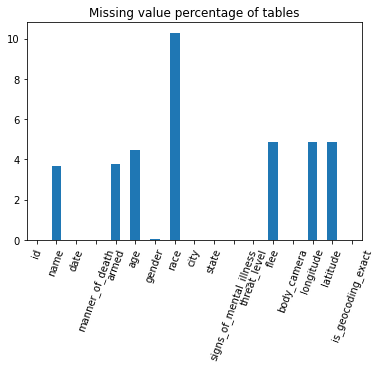

In [6]:
#Plotting the gpaph
null_perc.plot.bar(x="", y="", rot=70, title="Missing value percentage of tables")

plt.show(block=True);

From graph above it is alsolutely obvious that  7 columns out of 17 have missing values, and most of them are in race table.
    There is 
+ Get rid of (delete) the rows that have missing data
+ Get rid of (delete) the columns that have a high incidence of missing data
+ Add in a default value for the missing data

 null value treating techniques.


| Column with null value | Percentage of null value | Teqnique used to deal with null values | Reason
| --- | --- | --- | --- |
| name | 3.67 | Ignored | Column will not be used in analysis  |
| armed | 3.76 | Replaced with default value | One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown" |
| age | 4.45 | Replaced with default value  |  One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"|
| gender | 0.02 |  Replaced with default value |One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"|
| race | 10.29 | Replaced with default value  |  One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"  |
| flee | 4.85 | Ignored |  Column will not be used in analysis  |
| longitude | 4.84 | Scrapped | Important column and can be scrapped|
| latitude | 4.84 | Scrapped | Important column and can be scrapped |

In [7]:
#Replacing null values
df["race"].fillna("unknown", inplace = True) 
df["age"].fillna("unknown", inplace = True) 
df["armed"].fillna("unknown", inplace = True)
df["gender"].fillna("unknown", inplace = True) 


## 3.2 Preparation for scrapping

  In order to deal with null values in 'longitude' and 'latitude' columns it was decided to scrap these values by their city and state. The first step to scrap is the preparation. Main task is to form a new dataset with the name of cities and states which he have to scrap coordinates for. 

In [54]:
#Identifying indexes and addinng them to list where longitude colum's value iis null
city_state = df[df['longitude'].isnull()].index.tolist()

#Converting this list to array 
city_state_arr=np.asarray(city_state)
#Slicing data frame by the indexes and selecting id, city and state columns and creating new dataframe
city_state_df = pd.DataFrame(df.iloc[city_state_arr,[0,8,9]].values, columns=["id","City","State"])

#Printing first 5 values of the dataset
city_state_df.head()


,id,City,State


In [9]:
#Checking if dataframe is formed correctly with all the values
city_state_df.shape

(273, 3)

## 3.3 Scrapping


Scrapping the longditude and latitudes of locations 

In [10]:
from opencage.geocoder import OpenCageGeocode
#api
key = "ddceeb80069e48238d2148fe2ee03a1a"

geocoder = OpenCageGeocode(key)

In [11]:
#creating empty lists 

latitude_list = []  

longitude_list = []

 # iterating over rows in dataframe

for index, row in city_state_df.iterrows():

    City = row['City']
    State = row['State']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
#appending values to the list
    latitude_list.append(lat)
    longitude_list.append(long)


# create new columns from lists    
city_state_df['longitude'] = longitude_list

city_state_df['latitude'] = latitude_list   



#printing the dataset
city_state_df.head()

,id,City,State,longitude,latitude
0,1552,Chesterfield County,SC,-80.141784,34.650058
1,1556,Flagstaff,AZ,-111.651823,35.198752
2,1555,Oxford,MA,-71.859289,42.133631
3,1572,Solvang,CA,-120.139089,34.595857
4,1586,Newnan,GA,-84.799657,33.380672


In [12]:
#converting datatype of id column to integer
city_state_df=city_state_df.astype({'id': 'int64'})
#rounding latitude and longitude
decimals = 3   
city_state_df['longitude'] = city_state_df['longitude'].apply(lambda x: round(x, decimals))
city_state_df['latitude'] = city_state_df['latitude'].apply(lambda x: round(x, decimals))
#dropping city and state because it would be inconvient to merge to original dataset
city_state_df=city_state_df.drop(['City', 'State'], axis=1)
city_state_df.head()

,id,longitude,latitude
0,1552,-80.142,34.650
1,1556,-111.652,35.199
2,1555,-71.859,42.134
3,1572,-120.139,34.596
4,1586,-84.800,33.381


In [13]:
#Combining two datasets by the common id column
df =df.set_index("id").combine_first(city_state_df.set_index("id")).reset_index()
df.head()

,id,age,armed,body_camera,city,date,flee,gender,is_geocoding_exact,latitude,longitude,manner_of_death,name,race,signs_of_mental_illness,state,threat_level
0,3,53,gun,False,Shelton,2015-01-02,Not fleeing,M,True,47.247,-123.122,shot,Tim Elliot,A,True,WA,attack
1,4,47,gun,False,Aloha,2015-01-02,Not fleeing,M,True,45.487,-122.892,shot,Lewis Lee Lembke,W,False,OR,attack
2,5,23,unarmed,False,Wichita,2015-01-03,Not fleeing,M,True,37.695,-97.281,shot and Tasered,John Paul Quintero,H,False,KS,other
3,8,32,toy weapon,False,San Francisco,2015-01-04,Not fleeing,M,True,37.763,-122.422,shot,Matthew Hoffman,W,True,CA,attack
4,9,39,nail gun,False,Evans,2015-01-04,Not fleeing,M,True,40.384,-104.692,shot,Michael Rodriguez,H,False,CO,attack


In [14]:
#After combining columns were sorted alphabetically, so we have to change columns order to convinient one
df = df[['id', 'name','date','manner_of_death','armed','age','gender','race','city','state','signs_of_mental_illness','threat_level','flee','body_camera','longitude','latitude','is_geocoding_exact']]
df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [15]:
#Obtaining information about dataset in order to check if null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5645 non-null   int64         
 1   name                     5438 non-null   object        
 2   date                     5645 non-null   datetime64[ns]
 3   manner_of_death          5645 non-null   object        
 4   armed                    5645 non-null   object        
 5   age                      5645 non-null   object        
 6   gender                   5645 non-null   object        
 7   race                     5645 non-null   object        
 8   city                     5645 non-null   object        
 9   state                    5645 non-null   object        
 10  signs_of_mental_illness  5645 non-null   bool          
 11  threat_level             5645 non-null   object        
 12  flee                     5371 non-

Longitude and latitude values obtained. Other null values are not crucial for analysis and therefore can be ignored

## 4.Data Analysis (Visualisation)

### 4.1 Q1: Analyze the growth of the number of incidents

To analyze the number of shootings it was decided to divide incidents by their years and analyze cumulative number by months.

In [16]:
#Detaching year and month of shootings to use it in further analysis
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

#Identifying the number of incidents per year and month
df1=df.groupby(['year','month']).size().reset_index(name='count')
df1=df1[['year','count','month']]

#Finding a cumulative number for each year
df1['count']=df1.groupby(['year']).cumsum()

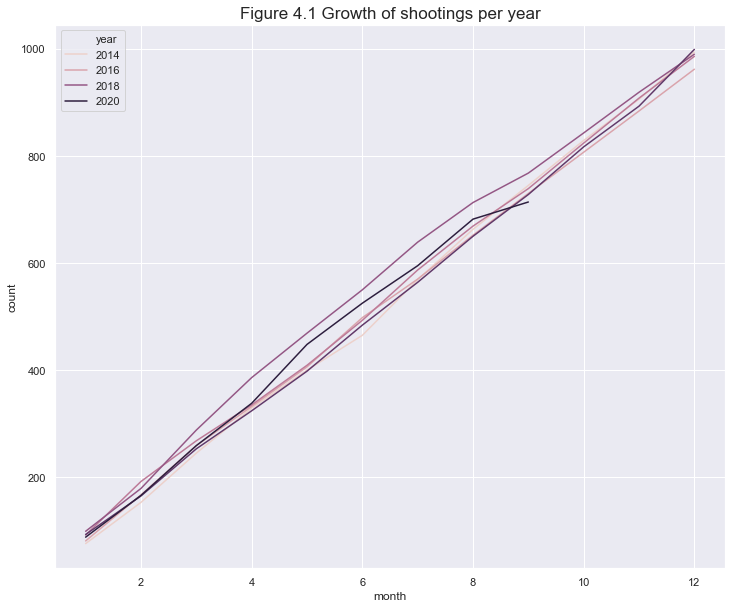

In [17]:
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(data=df1,x='month',y='count',hue="year").set_title('Figure 4.1 Growth of shootings per year',fontsize=17);


According to the graph above, number of fatal shootings reaches 1000 anually. 
Rate ofshootings is steady and growth is close to linear.
Number of cases every year is relatively similar.

## 4.2 Q2: Observe the age of victims and define an age group which was shot the most 

To observe the ages of police brutality victims it was decided to plot a distribution of ages and draw a box plot. 
Initial step is data preparation. Age column is chosen and some data type conversions and dropping unknown values was performed, which followed by plotting the graphs

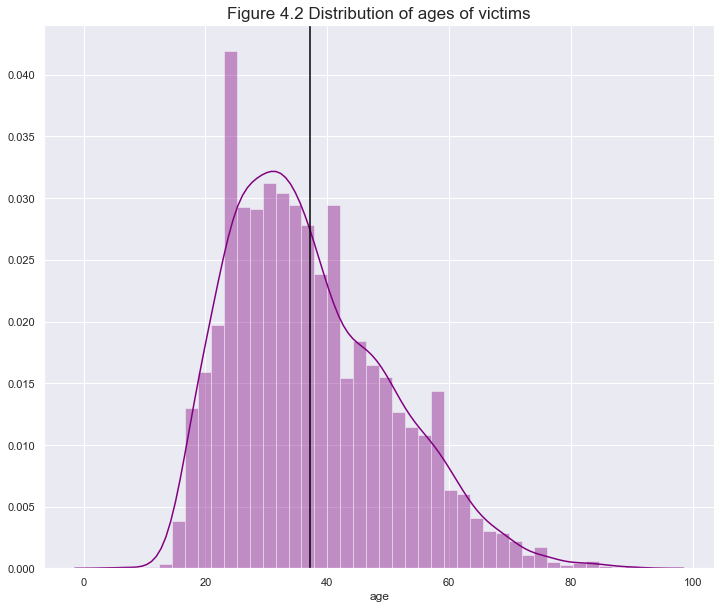

In [18]:
#Converting datatypes of age 
x=df['age'].astype(str)
#Determining indexes of unknown values
i=x[(x == 'unknown') ].index
#Dropping unknown values
x=x.drop(index=i)
#Converting to float
x=x.astype(float)


#Determining mean value
mean=x.values.mean()

#Plotting
sns.distplot(x, color='purple').set_title('Figure 4.2 Distribution of ages of victims',fontsize=17);
plt.axvline(mean,0,1,color='black');

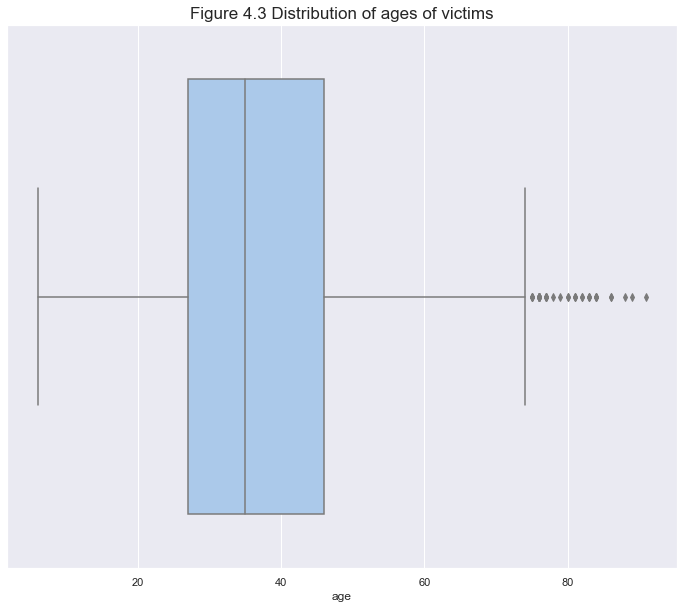

In [19]:
#Plotting boxplot
sns.boxplot(x, palette='pastel').set_title('Figure 4.3 Distribution of ages of victims',fontsize=17);

Both of the plots skewed to the right. 

Majority is around 20-40 years. While average age is almost 40.

In conclusion, from the graphs above it is clear that mostly young people were shot by police. 

## 4.3 Q3: Find out if there is any specific region where shootings occured the most

To achieve this two types of graphs.
The first one is to show cases by their exact coordinates. 
While the second one is in a grouped by states and shows the number of cases per state.

In [214]:
#plotting the graph
fig = px.scatter_mapbox(df, #name of dataset
                        lat="latitude", #latitude values
                        lon="longitude", #longitude values
                        hover_name="name", #hover title
                        hover_data=[ "date","city","state"], #hover info
                        color_discrete_sequence=["yellow"], #color of dots and hover
                        zoom=3, 
                        height=300)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ]
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title = 'Figure 4.4 Incidents '
)
fig.show()

In [215]:
#Data preparation, grouping cases by states 
df2=df.groupby(['state']).size().reset_index(name='count')

#plotting
fig = go.Figure(data=go.Choropleth(
    locations=df2['state'], # States
    z = df2['count'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of victims",
))

fig.update_layout(
    title_text = 'Figure 4.5 Number of killed people by states', #title of the graph
    geo_scope='usa', # limiting the map scope to USA
)

fig.show()


By the first map most of the shootings were occured in the eastern west and north-east of the USA. 
Second map gives more detailed view, and concludes that most cases happened in states like California, Texas and Florida. However, this conclusion is reasonable due to the fact that these 3 states are the top three most populated states in the country. 

## 4.4 Q4: Define if  "shooting bias" is real and if probability of shooting people of color is higher

Question is to show if there is major difference between races of shot people.
To answer that new dataframe with number of shootings for races by year is created.  

In [49]:
#Grouping number of cases by year and race
race_year_df=df.groupby(['year','race']).size().reset_index(name='count')

race_year_df.head()

,year,race,count
0,2015,A,14
1,2015,B,258
2,2015,H,172
3,2015,N,9
4,2015,O,14


However, this number alone can not give the full picture unless the whole population is not considered. 
From US Census Bureau population data from April 1, 2019 by race is obtained and new dataframe created. Number of population would be in millions.


In [174]:
#New dataframe creation
race_df= pd.DataFrame({'race':['W','B','A','H','N','O'],
'population':[197.271, 43.984,19.366, 60.724, 4.267, 9.847]})

race_df.head()

,race,population
0,W,197.271
1,B,43.984
2,A,19.366
3,H,60.724
4,N,4.267


To visualize obtained data two dataframes have to be merged. Also, ratio of shootings per million people is obtained by dividing number of cases by population in millions. New column will represents number of deaths per million people.

In [175]:
#Merging
race_pop = pd.merge(race_year_df,race_df,on='race')
race_pop['death_per_m']=race_pop['count']/race_pop['population']

race_pop.head()

,year,race,count,population,death_per_m
0,2015,A,14,19.366,0.722916
1,2016,A,15,19.366,0.774553
2,2017,A,16,19.366,0.826190
3,2018,A,20,19.366,1.032738
4,2019,A,19,19.366,0.981101


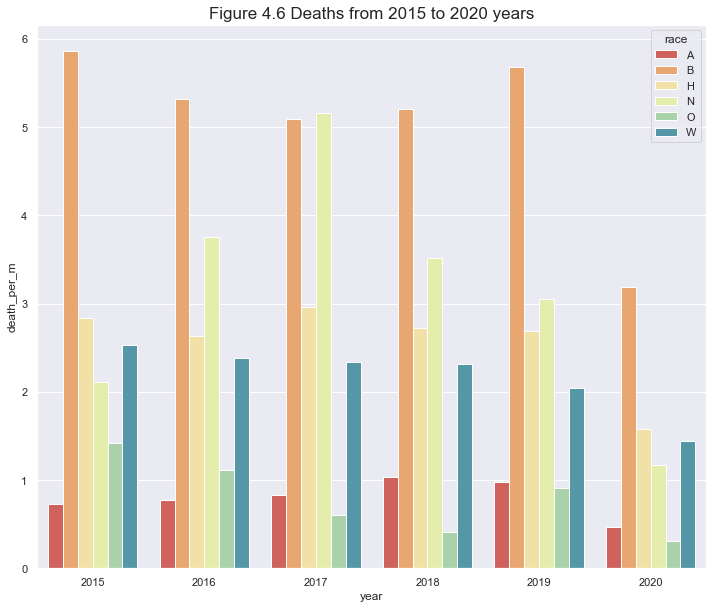

In [217]:

sns.barplot(x='year',
            y='death_per_m',
            hue='race',
            data=race_pop,
            palette="Spectral" );
plt.title('Figure 4.6 Deaths from 2015 to 2020 years',fontsize=17);

From the barchart above it is obvious that number of killed black people is more. 
The Native people have the lowest population share therefore rate of killed Native people is higher than other races. This bar can be ignored.
Rate of black people deaths is the highest, followed by hispanic and white. Asians and other races were the least shot races.

## 4.5 Q4: Define if "shooting bias" is real and if probability of shooting people of color is higher

To answer question precisely the total number of shootings by races had to be obtained,plotted and compared. 

In [177]:
#Grouping cases by races
df_race=df.groupby(['race']).size().reset_index(name='count')

#Merging with previously created race population dataframe
df_race = pd.merge(df_race,race_df,on='race')

#Obtaining racio of killed people per population
df_race['death_per_m']=df_race['count']/df_race['population']

df_race

,race,count,population,death_per_m
0,A,93,19.366,4.802231
1,B,1335,43.984,30.351946
2,H,936,60.724,15.414004
3,N,80,4.267,18.748535
4,O,47,9.847,4.773027
5,W,2573,197.271,13.042971


New dataframe shows the total number of fatal shootings for 5 year period by races. Races like Native and Other have the lowest number, therefore in comparasion they have to be ignored. 
With these data another barplot is created.

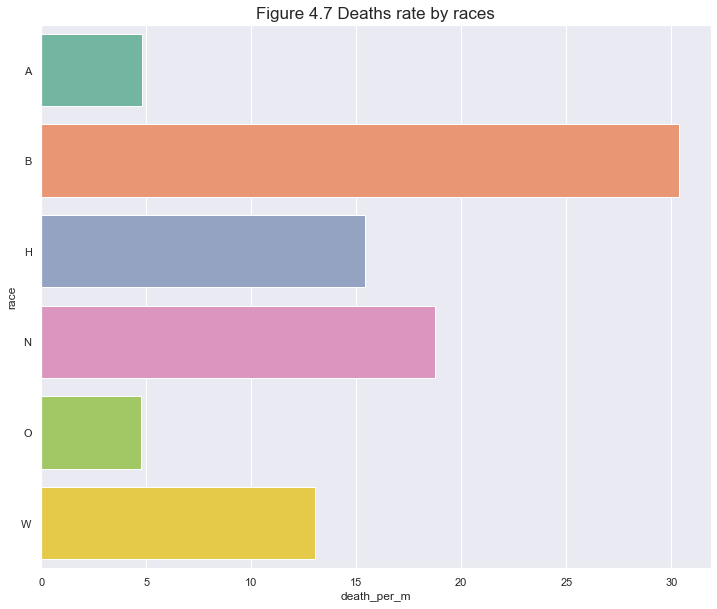

In [178]:
sns.barplot(x='death_per_m', y='race', data=df_race,palette="Set2", ci=None, orient='h' );
plt.title('Figure 4.7 Deaths rate by races',fontsize=17);

From the graph above number of total death per million people of Black people is the highest. 
Rate of Hispanics is less for about half and rate of White is one-third of Black races' rate. Asians have the lowest rate among colored people. 


The plotted two bar charts totally confirm "shooting bias", which is expressed in highest rate of shooting of black Americans. Therefore, probability of being shot by police officer depends on race. 

## 4.6 Q5: Analyze how gender affects the likelihood of getting shot

In order to answer given question, the number of shot people by gender have to be found.

In [179]:
#Creating new dataframe with gender and number of killed people
gender_df=df.groupby(['gender']).size().reset_index(name='count')

gender_df

,gender,count
0,F,248
1,M,5396
2,unknown,1


The best way to illustrate these numbers is to plot pie chart with the shares of men amd women.

In [180]:
#Plotting pie chart
fig = go.Figure(data=[go.Pie(labels=gender_df['gender'], values=gender_df['count'], pull=[0, 0.2])]);


fig.update_layout(
    title_text="Figure 4.8 Lethal Shootings by gender",);
fig.show();

An overwhelming majority of people shot and killed by police are male — over 95 percent. That is to say men have higher probability getting shot by officer than women.

## 4.7 Q6: Find the specific group of people that have the highest risk of being killed by police 


The aim is to find highest rate of shootings in the United States by age, race, and gender. Data has to grouped by these characteristics and rate of killed people calculated per 100,000 people.

In [196]:
#Creating new dataframe 
dataframe=df.groupby(['age','race','gender']).size().reset_index(name='count')
dataframe = pd.merge(dataframe,race_df,on='race')

#Adding column to find deaths per 100 thousand people
dataframe['deaths']=dataframe['count']/dataframe['population']*10

#Data preparation
dataframe['age']=dataframe['age'].astype(str)
indexNames = dataframe[ dataframe['age'] == 'unknown'].index
indexNames2 = dataframe[ dataframe['gender'] == 'unknown'].index

dataframe.drop(indexNames , inplace=True)
dataframe.drop(indexNames2 , inplace=True)

dataframe['age']=dataframe['age'].astype(float)


dataframe.head()

,age,race,gender,count,population,deaths
0,6.0,W,M,2,197.271,0.101383
1,12.0,W,F,1,197.271,0.050692
2,15.0,W,M,3,197.271,0.152075
3,16.0,W,M,10,197.271,0.506917
4,17.0,W,F,4,197.271,0.202767


In order to have clear picture 12  different line plots have to plotted, where rate of victims per age is represented. Native Americans' data can be ignored due to low population.

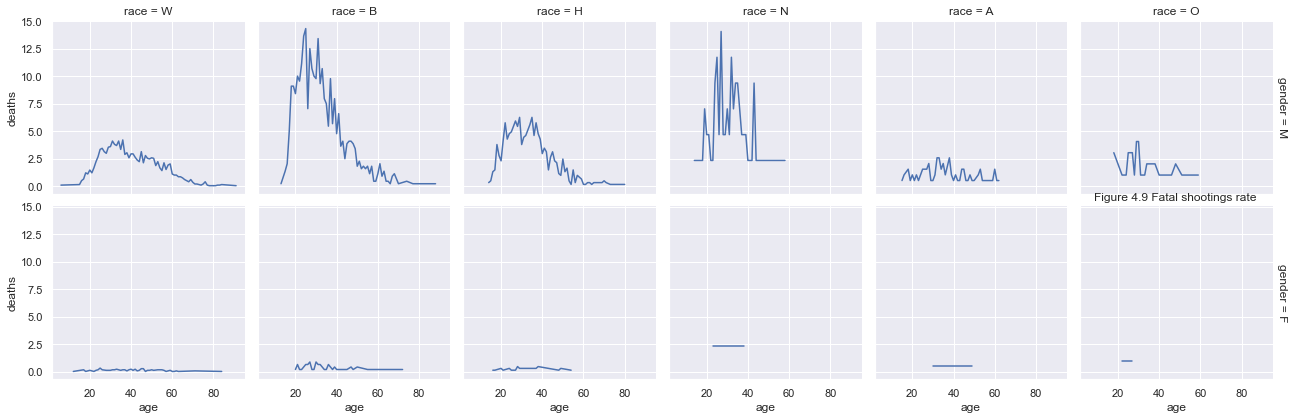

In [213]:
#Plotting
grid = sns.FacetGrid(dataframe, row="gender", col="race", margin_titles=True)

grid.map(sns.lineplot, "age","deaths");

plt.title('Figure 4.9 Fatal shootings rate ');

Graphs show that black male Americans' death rate per 100,000 people is the highest, with age from 20 to 40. 
Overall, males more prone to be shot, than females. However, among both men and women rate of black and hispanics' rate is higher in comparison with white people.

## 4.8 Q7: Determine specific period where shootings occured the most 

To analyze that number of cases by year and month should be determinded. 

In [108]:
#Grouping cases by months and years
df3=df.groupby(['year','month']).size().reset_index(name='count')

df3.head()

,year,month,count
0,2015,1,76
1,2015,2,77
2,2015,3,92
3,2015,4,84
4,2015,5,71


To visualize this data, pivot table has to be constructed.

In [109]:
df4=df3.pivot_table(values='count', index='month', columns='year')

df4.head()

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,76.0,81.0,92.0,99.0,93.0,88.0
2,77.0,86.0,100.0,80.0,72.0,78.0
3,92.0,92.0,76.0,109.0,88.0,93.0
4,84.0,73.0,67.0,98.0,71.0,79.0
5,71.0,74.0,74.0,83.0,74.0,110.0


It is decided to use a heatmap to create a clear picture of number of cases for certain time period

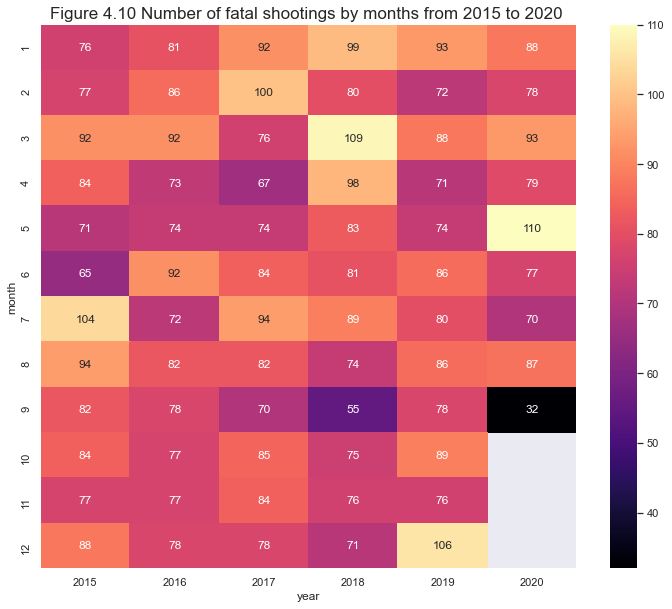

In [193]:
#Plotting a heatmap
sns.heatmap(df4, annot=True,cmap='magma',fmt='g');
plt.title('Figure 4.10 Number of fatal shootings by months from 2015 to 2020 ',fontsize=17);

According to heatmap, in the 5 year period deadliest month among police-involved homcides was May 2020. 


May is the time where one of the most historically important case shooting of George Floyd occured. Also, media covered famous cases like shooting of 20-year-old men in Hayward, California and fatal shooting in  Ahwatukee, Arizona.


These cases made society realize how brutal and biased their "protecters" are. Moreover, possesed Black lives matter movement and caused a number of protests in US and all over the world standing against racism.

## 5. Conclusion

There are about 1,000 people are killed annually from police forces from 2015 to 2020 years.


Even though Americans of all races, ethnicities, ages, classes, and genders have been subjected to police brutality.


However, most of the victoms were at young age, which means that risk of being deadly shot by police forse peaks between the ages of 20  and 35. Talking about gender, 95 of every 100 victims are male. Besides,the great majority of victims have been African American. Police shootings of unarmed Black people in the United States were three times higher than that of white people. Homocide performed by police of these historically oppressed group is explained by racism among members of mostly white police departments. 


Results of these analysis show that people of color face a higher likelihood of being killed by police than do white men and women, that risk peaks in young adulthood, and that men of color face experience the risk of being killed by police for their whole lives.


The findings reveal and prove that the issue of racial inquality is still one of the major problems in United States
